In [ ]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"


!sudo add-apt-repository ppa:alessandro-strada/ppa
!sudo apt update
!sudo apt install google-drive-ocamlfuse
!google-drive-ocamlfuse


!sudo apt-get install w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser


%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=QCXeuChDJO9JGKK5DLYKaEOdtJ5LHG5eP%2FhzU3RjzbQ'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/usr/bin/open: 882: www-browser: not found
/usr/bin/open: 882: links2: not found
/usr/bin/open: 882: elinks: not found
/usr/bin/open: 882: links: not found
/usr/bin/open: 882: lynx: not found
/usr/bin/open: 882: w3m: not found
xdg-open: no method available for opening

In [ ]:
%cd My Drive

/content/gdrive/My Drive


In [ ]:
!ls

'Colab Notebooks'   path   Simulator


In [ ]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)
# %cd /gdrive/MyDrive

MessageError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import torch
import pandas as pd
import torchvision
import torchvision.transforms as t
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [ ]:
!pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pymatreader import read_mat
data = read_mat('Simulator/C_Easy1_noise005.mat')

In [ ]:
spike_class = data['spike_class'][0][:]
spike_data = data['data']
spike_times = data['spike_times']

In [ ]:
idx_spike=spike_times
num_spike=len(spike_times)

In [ ]:
num_sample_forward=50
num_sample_backward=0
spike_curve=np.zeros((num_spike,num_sample_forward-num_sample_backward))
for i in range(num_spike):
    spike_curve[i]=spike_data[(idx_spike[i]+num_sample_backward):(idx_spike[i]+num_sample_forward)]

Text(0, 0.5, 'uV')

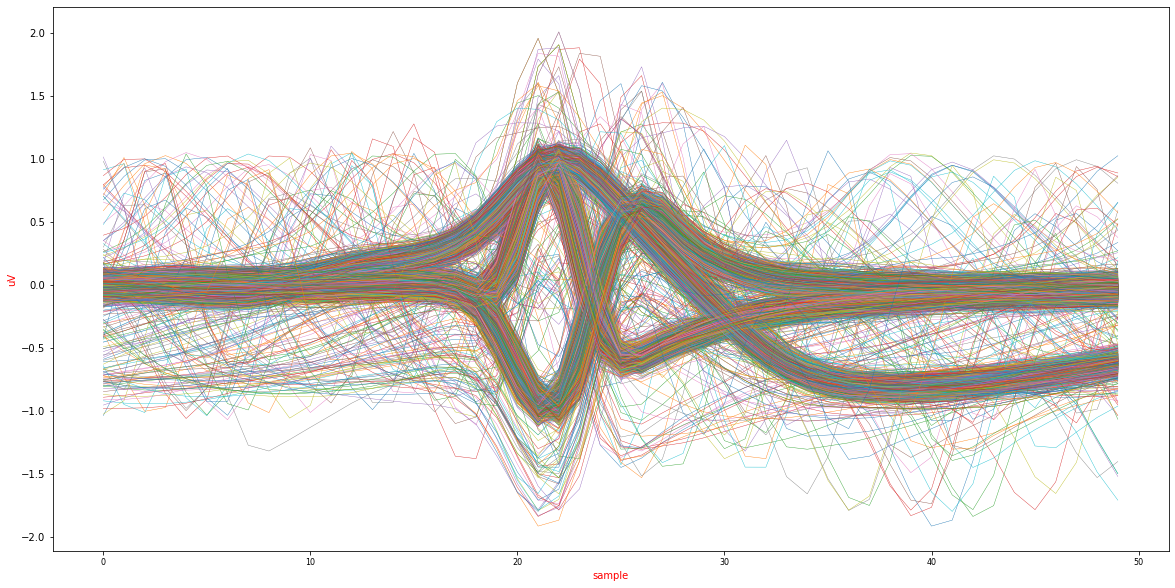

In [ ]:
plt.figure(figsize=(20,10))
for i in range(num_spike):
    plt.plot(spike_curve[i],linewidth=0.4)
plt.xticks(fontsize=8)
plt.xlabel('sample',color='red')
plt.ylabel('uV',color='red')

In [ ]:
scales = np.arange(1, 51)

In [ ]:
wavelet = np.zeros((len(spike_curve), 50, 50))
for i in range(len(spike_curve)):
    # Compute CWT coefficients for Morlet wavelet
    cwtmatr = signal.cwt(spike_curve[i], signal.morlet, scales)
    wavelet[i, :, :] = cwtmatr

    # # Compute CWT coefficients for Ricker wavelet
    # cwtmatr = signal.cwt(spike_curve[i], signal.ricker, scales)
    # wavelet[i, 1, :, :] = cwtmatr

    # # Compute CWT coefficients for other wavelet family (replace with desired wavelet family)
    # cwtmatr = signal.cwt(spike_curve[i], signal.gaussian, scales)
    # wavelet[i, 2, :, :] = cwtmatr



<ipython-input-19-e5604fa5907e>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  wavelet[i, :, :] = cwtmatr


In [ ]:
# from scipy import ndimage
# resized_wavelet = np.zeros((len(spike_curve), 3, 224, 224))
# for i in range(len(spike_curve)):
#     for j in range(3):
#         resized_wavelet[i, j, :, :] = ndimage.zoom(wavelet[i, j, :, :], (224/50, 224/50))

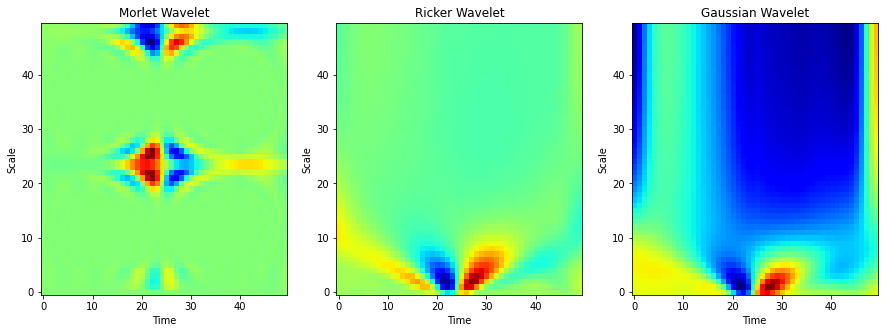

In [ ]:
# spk = 56
# # Get the CWT coefficients for the first spike curve for all three wavelets
# morlet_coeffs =  wavelet[spk, 0, :, :]
# ricker_coeffs =  wavelet[spk, 1, :, :]
# gaussian_coeffs = wavelet[spk, 2, :, :]

# # Plot the scalograms for all three wavelets
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# axs[0].imshow(morlet_coeffs, aspect='auto', cmap='jet', origin='lower')
# axs[0].set_title('Morlet Wavelet')
# axs[0].set_xlabel('Time')
# axs[0].set_ylabel('Scale')

# axs[1].imshow(ricker_coeffs, aspect='auto', cmap='jet', origin='lower')
# axs[1].set_title('Ricker Wavelet')
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Scale')

# axs[2].imshow(gaussian_coeffs, aspect='auto', cmap='jet', origin='lower')
# axs[2].set_title('Gaussian Wavelet')
# axs[2].set_xlabel('Time')
# axs[2].set_ylabel('Scale')

# plt.show()


In [ ]:
import torchvision.models as models

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(50, 224*224)
        self.relu = nn.ReLU(inplace=True)
        self.upsample = nn.Upsample(size=(224, 224), mode='bilinear', align_corners=False)
        # Load the VGG model
        self.vgg = models.vgg16(pretrained=True)
        for param in self.vgg.parameters():
            param.requires_grad = False
        for param in self.vgg.classifier[-1].parameters():
            param.requires_grad = True
        # Replace the last layer with a new layer with 3 output features
        self.vgg.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        num_features = self.vgg.classifier[-1].in_features
        self.vgg.classifier[-1] = nn.Linear(num_features, 3)


    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = x.view(-1, 1, 224, 224)
        x = self.upsample(x)
        # Pass the input through the VGG model
        x = self.vgg(x)
        # Pass the output through the softmax layer
        return x


In [ ]:
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device\n")
model.to(device)    # Convert model parameters and buffers to CPU or Cuda
#summary(model, (1, 1, 50))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The model will be running on cuda:0 device



Net(
  (linear1): Linear(in_features=50, out_features=50176, bias=True)
  (relu): ReLU(inplace=True)
  (upsample): Upsample(size=(224, 224), mode=bilinear)
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13

In [ ]:
# dd = torch.randn([1,1,50]).to(device)
# print(model(dd))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Load your data and labels
label = spike_class-1
data = spike_curve
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std


X_train, test_data, X_label, test_label = train_test_split(data, label, test_size=0.50,stratify=label,shuffle = True)
train_data, val_data, train_label, val_label = train_test_split(X_train, X_label, test_size=0.05,stratify=X_label,shuffle = True)

# Convert the data and labels to PyTorch tensors
train_inputs = torch.from_numpy(train_data).float().unsqueeze(1)
val_inputs = torch.from_numpy(val_data).float().unsqueeze(1)
test_inputs = torch.from_numpy(test_data).float().unsqueeze(1)
train_labels = torch.from_numpy(train_label).float()
val_labels = torch.from_numpy(val_label).float()
test_labels = torch.from_numpy(test_label).float()



In [ ]:
print(train_inputs.shape)
print(val_inputs.shape)
print(test_inputs.shape)
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

torch.Size([1650, 1, 50])
torch.Size([87, 1, 50])
torch.Size([1738, 1, 50])
torch.Size([1650])
torch.Size([87])
torch.Size([1738])


In [ ]:
num_epochs = 25

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.ASGD(model.parameters(), lr=0.01,weight_decay=0.0001)
#optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
inputs = torch.tensor([])
# Train the network
for epoch in range(num_epochs):
  training_loss = 0
  loss_back = 0
  for i in range(0, train_inputs.size(0)):
    # Get the input and labels for the current batch
    inputs = train_inputs[i:i+1].to(device)
    labels = train_labels[i:i+1].to(device)
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels.long())
    training_loss += loss
    loss_back += loss
    if i % 25 == 0:
        optimizer.zero_grad()
        # Backward pass and optimization
        loss_back.backward()
        optimizer.step()
        loss_back = 0
  training_loss = training_loss/train_inputs.size(0)
  print('******************************************************************')
  print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, training_loss))
  with torch.no_grad():
          correct = 0
          val_loss = 0
          for j in range(0,val_inputs.size(0)):
            # Get the input and labels for the current batch
            inputs = val_inputs[j:j+1].to(device)
            labels = val_labels[j:j+1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            val_loss += loss
          val_loss = val_loss/val_inputs.size(0)
          print('Validation Loss: {:.4f}'.format(val_loss))
          print('Validation Accuracy: {:.2f}% ({}/{})'.format(100*correct/val_inputs.size(0), correct, val_inputs.size(0)))

# Test the network on the test set
with torch.no_grad():
  test_loss = 0
  correct = 0
  total = 0
  for i in range(0, test_inputs.size(0)):
        # Get the input and labels for the current batch
        inputs = test_inputs[i:i+1].to(device)
        labels = test_labels[i:i+1].to(device)
        outputs = model(inputs)
        # Get the predictions
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels.long())
        test_loss += loss

print('Test Loss: {:.4f}'.format(test_loss/test_inputs.size(0)))
print('Test Accuracy: {:.2f}% ({}/{})'.format(100*correct/test_inputs.size(0) , correct, test_inputs.size(0)))




******************************************************************
Epoch [1/25], Loss: 0.2075
Validation Loss: 0.0771
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [2/25], Loss: 0.0303
Validation Loss: 0.0474
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [3/25], Loss: 0.0260
Validation Loss: 0.0752
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [4/25], Loss: 0.0155
Validation Loss: 0.0684
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [5/25], Loss: 0.0056
Validation Loss: 0.0887
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [6/25], Loss: 0.0044
Validation Loss: 0.0693
Validation Accuracy: 98.85% (86/87)
******************************************************************
Epoch [7/

In [ ]:
with torch.no_grad():
  test_loss = 0
  correct = 0
  total = 0
  for i in range(0, test_inputs.size(0)):
        # Get the input and labels for the current batch
        inputs = test_inputs[i:i+1].to(device)
        labels = test_labels[i:i+1].to(device)
        outputs = model(inputs)
        # Get the predictions
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels.long())
        test_loss += loss

print('Test Loss: {:.4f}'.format(test_loss/test_inputs.size(0)))
print('Test Accuracy: {:.2f}% ({}/{})'.format(100*correct/test_inputs.size(0) , correct, test_inputs.size(0)))



Test Loss: 0.0272
Test Accuracy: 99.37% (1746/1757)


tensor([0.])
tensor([0.])
tensor([1.])
tensor([2.])
tensor([2.])
tensor([1.])
tensor([0.])
tensor([2.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([2.])
tensor([2.])
tensor([0.])
tensor([1.])
tensor([2.])
tensor([1.])
tensor([1.])


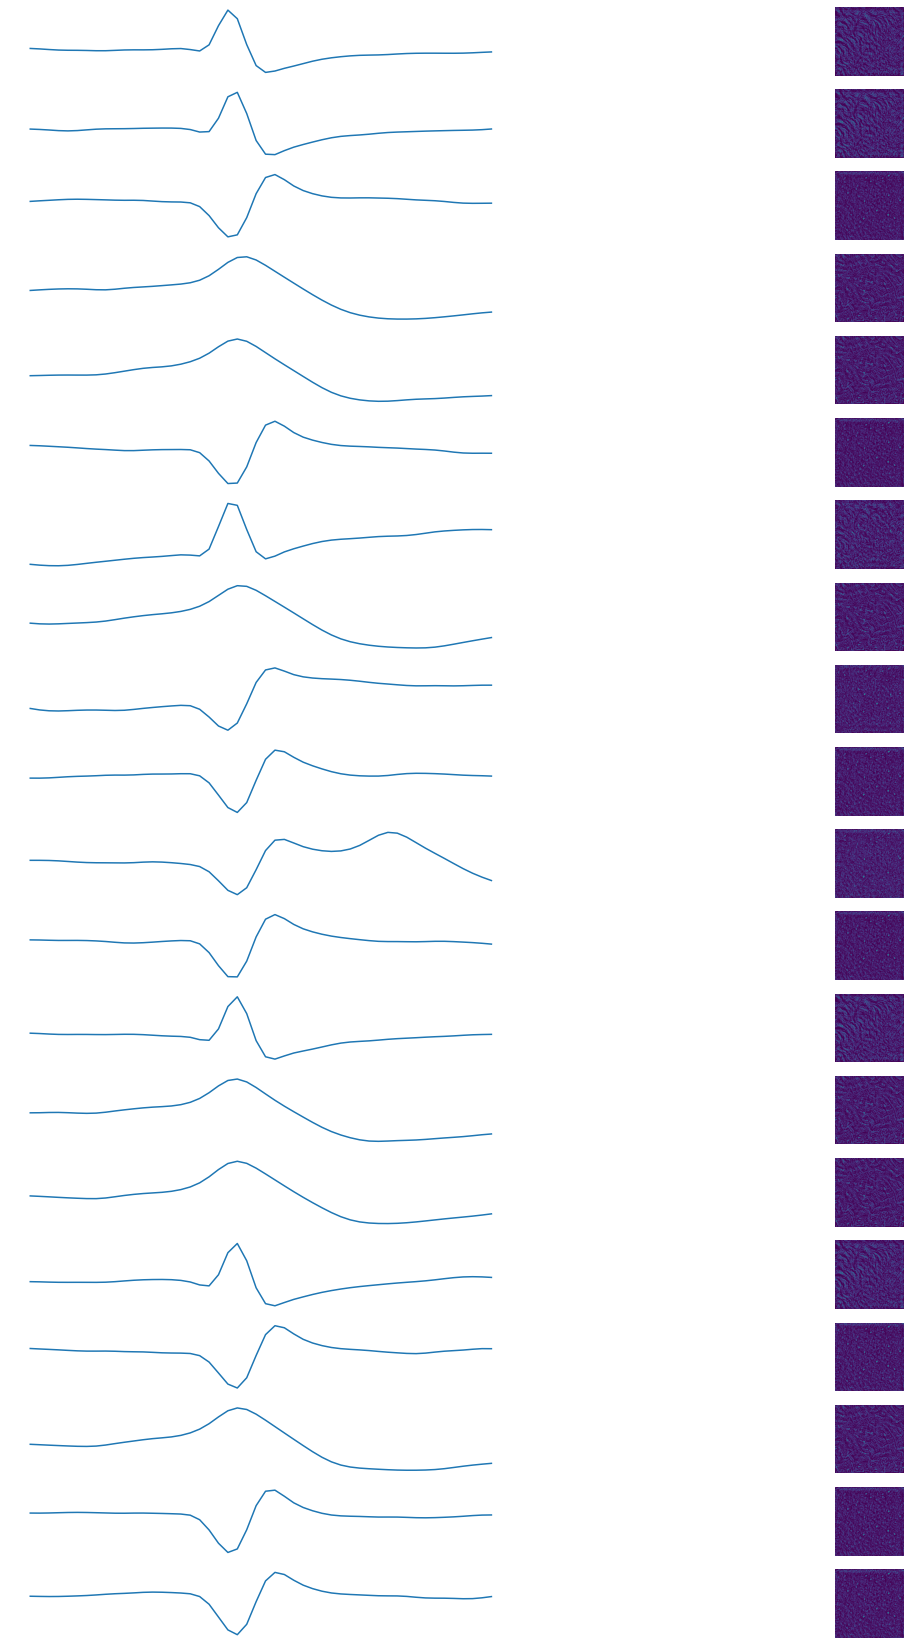

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create an instance of the network
# train the network here..

# plot the upsampled output for 10 inputs
num_inputs_to_plot = 20
fig, axs = plt.subplots(nrows=num_inputs_to_plot, ncols=2, figsize=(20, 30))

for i in range(num_inputs_to_plot):
    # select an input and pass it through the network to obtain the output
    input_index = i  # change this to select a different input
    input_data = train_inputs[input_index:input_index+1].to(device)
    label = train_labels[input_index:input_index+1]
    output_data = model(input_data)

    # extract the output of the upsample layer
    linear_output = model.linear1(input_data)
    relu_output = model.relu(linear_output)
    relu_output = relu_output.view(-1, 1, 224, 224)
    upsampled_output = model.upsample(relu_output)
    upsampled_output_cpu = upsampled_output.cpu()

    # convert the output to a numpy array and plot it
    upsampled_output_np = upsampled_output_cpu.detach().numpy()[0][0]
    print(label)
    axs[i, 0].plot(input_data[0, 0, :].cpu().numpy())
    axs[i, 1].imshow(upsampled_output_np)
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

plt.show()
